In [ ]:
import pandas as pd
import json
import nltk
nltk.download('punkt')  # For tokenization
nltk.download('stopwords')  # For stopwords
nltk.download('wordnet')  # For lemmatization
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import numpy as np

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import zipfile
# import os

# # Replace 'path/to/your/zip/file.zip' with the path to the zipped file in your Google Drive
# zip_path = '/content/drive/MyDrive/subtaskA/mono_pred/train_monoling.csv.zip'
# extract_path = '/content/drive/MyDrive/subtaskA/mono_pred'

# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_path)

# # Now, you can read the CSV file as you would normally do.
# import pandas as pd
# csv_file_path = os.path.join(extract_path, 'train_monoling.csv')
# train_df = pd.read_csv(csv_file_path)

In [ ]:
# # Replace 'path/to/your/zip/file.zip' with the path to the zipped file in your Google Drive
# zip_path = '/content/drive/MyDrive/subtaskA/mono_pred/dev_monoling.csv.zip'
# extract_path = '/content/drive/MyDrive/subtaskA/mono_pred'

# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_path)

# # Now, you can read the CSV file as you would normally do.
# import pandas as pd
# csv_file_path = os.path.join(extract_path, 'dev_monoling.csv')
# dev_df = pd.read_csv(csv_file_path)

# Read and Data peek





In [ ]:
train_df = pd.read_csv("/content/drive/MyDrive/subtaskA/mono_pred/train_monoling.csv")

In [ ]:
dev_df = pd.read_csv("/content/drive/MyDrive/subtaskA/mono_pred/dev_monoling.csv")

In [ ]:
train_df.shape,dev_df.shape

((119757, 5), (5000, 5))

In [ ]:
train_df.head()

,text,label,model,source,id
0,Forza Motorsport is a popular racing game that...,1,chatGPT,wikihow,0
1,Buying Virtual Console games for your Nintendo...,1,chatGPT,wikihow,1
2,Windows NT 4.0 was a popular operating system ...,1,chatGPT,wikihow,2
3,How to Make Perfume\n\nPerfume is a great way ...,1,chatGPT,wikihow,3
4,How to Convert Song Lyrics to a Song'\n\nConve...,1,chatGPT,wikihow,4


In [ ]:
dev_df.head()

,text,label,model,source,id
0,Giving gifts should always be enjoyable. Howe...,1,bloomz,wikihow,0
1,Yveltal (Japanese: ユベルタル) is one of the main a...,1,bloomz,wikihow,1
2,If you'd rather not annoy others by being rude...,1,bloomz,wikihow,2
3,If you're interested in visiting gravesite(s) ...,1,bloomz,wikihow,3
4,The following are some tips for becoming succe...,1,bloomz,wikihow,4


In [ ]:
train_df['label'].value_counts(normalize=True)

0    0.528996
1    0.471004
Name: label, dtype: float64

In [ ]:
dev_df['label'].value_counts(normalize=True)

1    0.5
0    0.5
Name: label, dtype: float64

In [ ]:
train_df['source'].unique()

array(['wikihow', 'wikipedia', 'reddit', 'arxiv', 'peerread'],
      dtype=object)

In [ ]:
dev_df['source'].unique()

array(['wikihow', 'wikipedia', 'reddit', 'arxiv', 'peerread'],
      dtype=object)

In [ ]:
train_df['model'].unique()

array(['chatGPT', 'cohere', 'davinci', 'dolly', 'human'], dtype=object)

In [ ]:
dev_df['model'].unique()

array(['bloomz', 'human'], dtype=object)

In [ ]:
train_df.groupby('model')['label'].value_counts()

model    label
chatGPT  1        14339
cohere   1        13678
davinci  1        14343
dolly    1        14046
human    0        63351
Name: label, dtype: int64

In [ ]:
dev_df.groupby('model')['label'].value_counts()

model   label
bloomz  1        2500
human   0        2500
Name: label, dtype: int64

# Features and EDA

Feature Functions

In [ ]:
def count_special_characters(text):

    return sum(not ch.isalnum() and not ch.isspace() for ch in text)


In [ ]:
def cat_label_avg_feat(df_train, df_dev, group_column, new_column_name):

    cat_label_average_mapper = df_train.groupby(group_column)['label'].mean().to_dict()
    df_train[new_column_name] = df_train[group_column].map(cat_label_average_mapper)
    df_dev[new_column_name] = df_dev[group_column].map(cat_label_average_mapper)

    return df_train, df_dev

In [ ]:
def Utest(df,df_name,group_col_name,cont_column_name):

  from scipy.stats import mannwhitneyu

  u_statistic, p_value = mannwhitneyu(
    df[df[group_col_name] == 0][cont_column_name],
    df[df[group_col_name] == 1][cont_column_name],
    alternative='two-sided'
  )
  print(f"{df_name:} {cont_column_name} Mann Whitney U test:")
  print("U-statistic:", u_statistic)
  print("P-value:", p_value)


# Features

1. Special Character

In [ ]:
train_df['Special_Characters_Count'] = train_df['text'].apply(count_special_characters)
dev_df['Special_Characters_Count'] = dev_df['text'].apply(count_special_characters)

In [ ]:
train_df['Text_Length'] = train_df['text'].apply(len)
dev_df['Text_Length'] = dev_df['text'].apply(len)

In [ ]:
train_df['Special_Characters_Ratio'] = train_df['Special_Characters_Count'] / train_df['Text_Length']
dev_df['Special_Characters_Ratio'] = dev_df['Special_Characters_Count'] / dev_df['Text_Length']

In [ ]:
def Utest(df,df_name,group_col_name,cont_column_name):

  from scipy.stats import mannwhitneyu

  u_statistic, p_value = mannwhitneyu(
    df[df[group_col_name] == 0][cont_column_name],
    df[df[group_col_name] == 1][cont_column_name],
    alternative='two-sided'
  )
  print(f"{df_name:} {cont_column_name} Mann Whitney U test:")
  print("U-statistic:", u_statistic)
  print("P-value:", p_value)


In [ ]:
train_df.head()

,text,label,model,source,id,Special_Characters_Count,Text_Length,Special_Characters_Ratio
0,Forza Motorsport is a popular racing game that...,1,chatGPT,wikihow,0,82,2244,0.036542
1,Buying Virtual Console games for your Nintendo...,1,chatGPT,wikihow,1,132,3728,0.035408
2,Windows NT 4.0 was a popular operating system ...,1,chatGPT,wikihow,2,157,5237,0.029979
3,How to Make Perfume\n\nPerfume is a great way ...,1,chatGPT,wikihow,3,152,4729,0.032142
4,How to Convert Song Lyrics to a Song'\n\nConve...,1,chatGPT,wikihow,4,89,3095,0.028756


Train data special char pattern

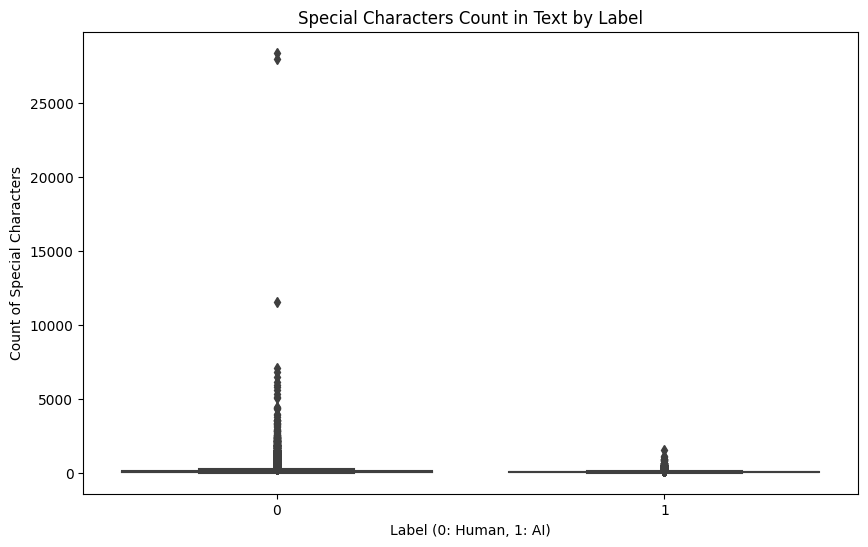

             count        mean         std  min   25%   50%    75%      max
label                                                                      
Human (0)  63351.0  112.025019  247.048026  0.0  36.0  60.0  122.0  28419.0
AI (1)     56406.0   49.706769   44.668844  0.0  26.0  38.0   56.0   1536.0


In [ ]:
stats= train_df.groupby('label')['Special_Characters_Count'].describe().rename(index={0: 'Human (0)', 1: 'AI (1)'})

plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='Special_Characters_Count', data=train_df)
plt.title('Special Characters Count in Text by Label')
plt.xlabel('Label (0: Human, 1: AI)')
plt.ylabel('Count of Special Characters')
plt.show()

print(stats)

<Axes: xlabel='Special_Characters_Count', ylabel='Count'>

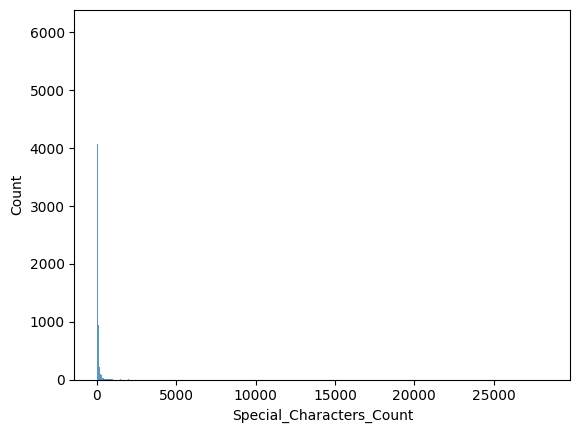

In [ ]:
sns.histplot(train_df['Special_Characters_Count'])

In [ ]:
# We need to check statistical diff between the use of special characters by human and ai.
# These are continous data and we see that it has a non normal or skewed distribution so we use Mann Whitney Utest
Utest(train_df,"Train","label","Special_Characters_Count")

Train Special_Characters_Count Mann Whitney U test:
U-statistic: 2450824331.5
P-value: 0.0


Dev data special char pattern

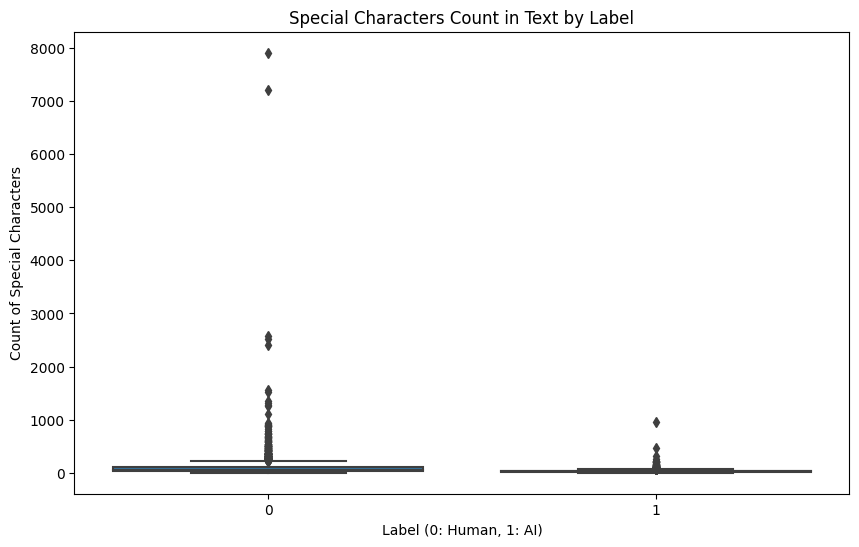

            count      mean         std  min   25%   50%    75%     max
label                                                                  
Human (0)  2500.0  105.5312  262.665746  0.0  32.0  54.0  108.0  7910.0
AI (1)     2500.0   30.6188   31.749165  2.0  16.0  23.5   37.0   951.0


In [ ]:
stats= dev_df.groupby('label')['Special_Characters_Count'].describe().rename(index={0: 'Human (0)', 1: 'AI (1)'})

plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='Special_Characters_Count', data=dev_df)
plt.title('Special Characters Count in Text by Label')
plt.xlabel('Label (0: Human, 1: AI)')
plt.ylabel('Count of Special Characters')
plt.show()

print(stats)
#print("T-statistic:", t_stat, "P-value:", p_value)

<Axes: xlabel='Special_Characters_Count', ylabel='Count'>

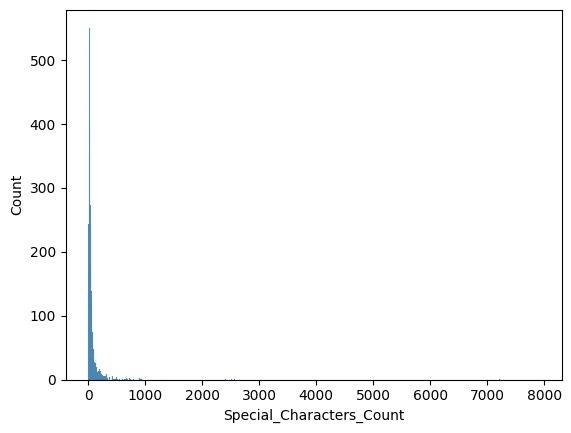

In [ ]:
sns.histplot(dev_df['Special_Characters_Count'])

In [ ]:
# We need to check statistical diff between the use of special characters by human and ai.
# As these are continous data and we see that it has a non normal or skewed distribution so we use Mann Whitney Utest
Utest(dev_df,"Dev","label","Special_Characters_Count")

Dev Special_Characters_Count Mann Whitney U test:
U-statistic: 4908093.0
P-value: 1.7693543207327126e-267


2. Categorical columns pattern with output labels

In [ ]:
train_df.columns

Index(['text', 'label', 'model', 'source', 'id', 'Special_Characters_Count',
       'Text_Length', 'Special_Characters_Ratio'],
      dtype='object')

In [ ]:
train_df['source'].value_counts(normalize=True)

reddit       0.229632
wikihow      0.229623
arxiv        0.229607
wikipedia    0.213182
peerread     0.097957
Name: source, dtype: float64

Binning Special Character Count column to convert it into categorical column

In [ ]:
train_df['Special_Characters_Count'].describe()

count    119757.000000
mean         82.672888
std         184.914206
min           0.000000
25%          30.000000
50%          46.000000
75%          85.000000
max       28419.000000
Name: Special_Characters_Count, dtype: float64

In [ ]:
dev_df['Special_Characters_Count'].describe()

count    5000.000000
mean       68.075000
std       190.779711
min         0.000000
25%        20.000000
50%        35.000000
75%        64.000000
max      7910.000000
Name: Special_Characters_Count, dtype: float64

In [ ]:
bin_edges = [0, 10, 20, 30, 40, 50,60,70,float('inf')]
bin_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60' ,'61-70','others']

train_df['scc_binned'] = pd.cut(train_df['Special_Characters_Count'], bins=bin_edges, labels=bin_labels)
dev_df['scc_binned'] = pd.cut(dev_df['Special_Characters_Count'], bins=bin_edges, labels=bin_labels)

In [ ]:
train_df['scc_binned'].value_counts(normalize=True)

others    0.309753
31-40     0.164697
21-30     0.161173
41-50     0.126291
51-60     0.083635
11-20     0.083409
61-70     0.057488
0-10      0.013554
Name: scc_binned, dtype: float64

In [ ]:
dev_df['scc_binned'].value_counts(normalize=True)

others    0.222489
21-30     0.191277
11-20     0.177671
31-40     0.123449
41-50     0.099240
0-10      0.075230
51-60     0.066226
61-70     0.044418
Name: scc_binned, dtype: float64

## 2.1 Source Column

In [ ]:
train_df.groupby('source')['label'].mean()

source
arxiv        0.436375
peerread     0.799079
reddit       0.436364
wikihow      0.436380
wikipedia    0.432158
Name: label, dtype: float64

In [ ]:
dev_df.groupby('source')['label'].mean()

source
arxiv        0.5
peerread     0.5
reddit       0.5
wikihow      0.5
wikipedia    0.5
Name: label, dtype: float64

No discernable pattern

## 2.2 Special Character Binned

In [ ]:
train_df.groupby('scc_binned')['label'].mean()

scc_binned
0-10      0.702403
11-20     0.696436
21-30     0.606684
31-40     0.572254
41-50     0.541229
51-60     0.473689
61-70     0.412841
others    0.257198
Name: label, dtype: float64

In [ ]:
dev_df.groupby('scc_binned')['label'].mean()

scc_binned
0-10      0.734043
11-20     0.818694
21-30     0.665272
31-40     0.529984
41-50     0.413306
51-60     0.371601
61-70     0.324324
others    0.120504
Name: label, dtype: float64

Distribution is close

In [ ]:
train_df, dev_df = cat_label_avg_feat(
    df_train=train_df,
    df_dev=dev_df,
    group_column='scc_binned',
    new_column_name='scc_bin_label_avg'
)

In [ ]:
train_df.isna().sum()

text                         0
label                        0
model                        0
source                       0
id                           0
Special_Characters_Count     0
Text_Length                  0
Special_Characters_Ratio     0
scc_binned                  10
scc_bin_label_avg           10
dtype: int64

feature has null values which need to be filled

In [ ]:
train_df[train_df['scc_bin_label_avg'].isna()==True]['Special_Characters_Count'].unique()

array([0])

feture is null where special character count is 0. So we impute feature value with 0

In [ ]:
train_df.dtypes

text                          object
label                          int64
model                         object
source                        object
id                             int64
Special_Characters_Count       int64
Text_Length                    int64
Special_Characters_Ratio     float64
scc_binned                  category
scc_bin_label_avg           category
dtype: object

In [ ]:
train_df['scc_bin_label_avg']=train_df['scc_bin_label_avg'].astype('float')
dev_df['scc_bin_label_avg']=dev_df['scc_bin_label_avg'].astype('float')

In [ ]:
train_df['scc_bin_label_avg'].fillna(0.0,inplace=True)
dev_df['scc_bin_label_avg'].fillna(0.0,inplace=True)

## 2.3 Text length Binned

In [ ]:
train_df.groupby(['label'])['Text_Length'].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,63351.0,3547.266010,5319.834821,10.0,1285.0,1804.0,3724.0,198470.0
1,56406.0,1931.031663,1108.084847,42.0,1230.0,1648.0,2234.0,14807.0


In [ ]:
Utest(train_df,"Train","label","Text_Length")

Train Text_Length Mann Whitney U test:
U-statistic: 2109372697.0
P-value: 0.0


In [ ]:
dev_df.groupby(['label'])['Text_Length'].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,2500.0,3127.1428,4880.068497,32.0,1196.75,1692.0,3069.00,104923.0
1,2500.0,998.8792,436.264819,119.0,832.00,971.0,1124.25,3840.0


In [ ]:
Utest(dev_df,"Dev","label","Text_Length")

Dev Text_Length Mann Whitney U test:
U-statistic: 5232691.0
P-value: 0.0


In [ ]:
train_df['Text_Length'].describe()

count    119757.000000
mean       2786.013519
std        4024.922554
min          10.000000
25%        1262.000000
50%        1712.000000
75%        2742.000000
max      198470.000000
Name: Text_Length, dtype: float64

In [ ]:
dev_df['Text_Length'].describe()

count      5000.000000
mean       2063.011000
std        3623.934292
min          32.000000
25%         933.750000
50%        1163.000000
75%        1817.000000
max      104923.000000
Name: Text_Length, dtype: float64

In [ ]:
bin_edges = [0, 900, 1000, 2000, 3000,float('inf')]
bin_labels = ['0-900', '901-1000', '1001-2000', '2001-3000', 'others']

train_df['tl_binned'] = pd.cut(train_df['Text_Length'], bins=bin_edges, labels=bin_labels)
dev_df['tl_binned'] = pd.cut(dev_df['Text_Length'], bins=bin_edges, labels=bin_labels)

Bin data distribution

In [ ]:
train_df['tl_binned'].value_counts(normalize=True)

1001-2000    0.550757
others       0.221123
2001-3000    0.168124
0-900        0.042945
901-1000     0.017051
Name: tl_binned, dtype: float64

In [ ]:
dev_df['tl_binned'].value_counts(normalize=True)

1001-2000    0.4588
0-900        0.2178
others       0.1290
901-1000     0.1120
2001-3000    0.0824
Name: tl_binned, dtype: float64

Avg AI per bin

In [ ]:
train_df.groupby('tl_binned')['label'].mean()

tl_binned
0-900        0.828894
901-1000     0.921156
1001-2000    0.481359
2001-3000    0.574849
others       0.262037
Name: label, dtype: float64

In [ ]:
dev_df.groupby('tl_binned')['label'].mean()

tl_binned
0-900        0.819100
901-1000     0.962500
1001-2000    0.430689
2001-3000    0.184466
others       0.007752
Name: label, dtype: float64

Creating the feature

In [ ]:
train_df, dev_df = cat_label_avg_feat(
    df_train=train_df,
    df_dev=dev_df,
    group_column='tl_binned',
    new_column_name='tl_bin_label_avg'
)

In [ ]:
train_df.dtypes

text                          object
label                          int64
model                         object
source                        object
id                             int64
Special_Characters_Count       int64
Text_Length                    int64
Special_Characters_Ratio     float64
scc_binned                  category
scc_bin_label_avg            float64
tl_binned                   category
tl_bin_label_avg            category
dtype: object

In [ ]:
train_df['tl_bin_label_avg']=train_df['tl_bin_label_avg'].astype('float')
dev_df['tl_bin_label_avg']=dev_df['tl_bin_label_avg'].astype('float')

In [ ]:
train_df.isna().sum()

text                         0
label                        0
model                        0
source                       0
id                           0
Special_Characters_Count     0
Text_Length                  0
Special_Characters_Ratio     0
scc_binned                  10
scc_bin_label_avg            0
tl_binned                    0
tl_bin_label_avg             0
dtype: int64

In [ ]:
dev_df.isna().sum()

text                        0
label                       0
model                       0
source                      0
id                          0
Special_Characters_Count    0
Text_Length                 0
Special_Characters_Ratio    0
scc_binned                  2
scc_bin_label_avg           0
tl_binned                   0
tl_bin_label_avg            0
dtype: int64

In [ ]:
train_df.head()

,text,label,model,source,id,Special_Characters_Count,Text_Length,Special_Characters_Ratio,scc_binned,scc_bin_label_avg,tl_binned,tl_bin_label_avg
0,Forza Motorsport is a popular racing game that...,1,chatGPT,wikihow,0,82,2244,0.036542,others,0.257198,2001-3000,0.574849
1,Buying Virtual Console games for your Nintendo...,1,chatGPT,wikihow,1,132,3728,0.035408,others,0.257198,others,0.262037
2,Windows NT 4.0 was a popular operating system ...,1,chatGPT,wikihow,2,157,5237,0.029979,others,0.257198,others,0.262037
3,How to Make Perfume\n\nPerfume is a great way ...,1,chatGPT,wikihow,3,152,4729,0.032142,others,0.257198,others,0.262037
4,How to Convert Song Lyrics to a Song'\n\nConve...,1,chatGPT,wikihow,4,89,3095,0.028756,others,0.257198,others,0.262037


# Correlation of features with output column

In [ ]:
corr_feature=['label','Special_Characters_Count','Text_Length', 'Special_Characters_Ratio',
              'scc_bin_label_avg','tl_bin_label_avg']

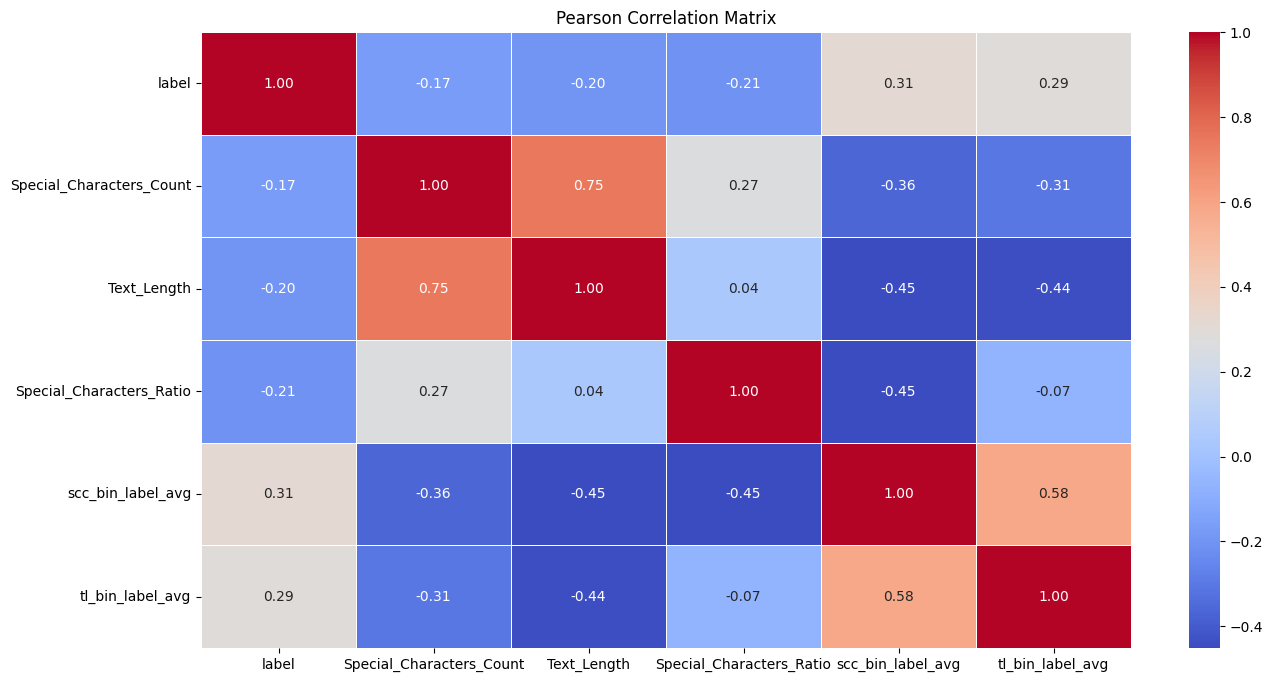

In [ ]:
correlation_matrix = train_df[corr_feature].corr(method='pearson')

# Use seaborn to create a heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Pearson Correlation Matrix')
plt.show()

# Random Forest Classifier

In [ ]:
feature=['Special_Characters_Count','Text_Length',
         'Special_Characters_Ratio','scc_bin_label_avg','tl_bin_label_avg']

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X_train = train_df[feature]
y_train = train_df['label']


X_dev = dev_df[feature]
y_dev = dev_df['label']


rfc = RandomForestClassifier(max_depth=3,n_estimators=100, random_state=42)

rfc.fit(X_train, y_train)


y_pred = rfc.predict(X_dev)


accuracy = accuracy_score(y_dev, y_pred)
report = classification_report(y_dev, y_pred)

print(f"Accuracy on development data: {accuracy}")
print(report)

Accuracy on development data: 0.7244
              precision    recall  f1-score   support

           0       0.74      0.70      0.72      2500
           1       0.71      0.75      0.73      2500

    accuracy                           0.72      5000
   macro avg       0.72      0.72      0.72      5000
weighted avg       0.72      0.72      0.72      5000



In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

print(confusion_matrix(dev_df['label'],y_pred))

[[1752  748]
 [ 630 1870]]


Feature ranking:
3. Special_Characters_Ratio (0.3453971436457154)
1. Special_Characters_Count (0.2241913003863615)
2. Text_Length (0.21716398740967724)
4. scc_bin_label_avg (0.11877980075377494)
5. tl_bin_label_avg (0.09446776780447097)


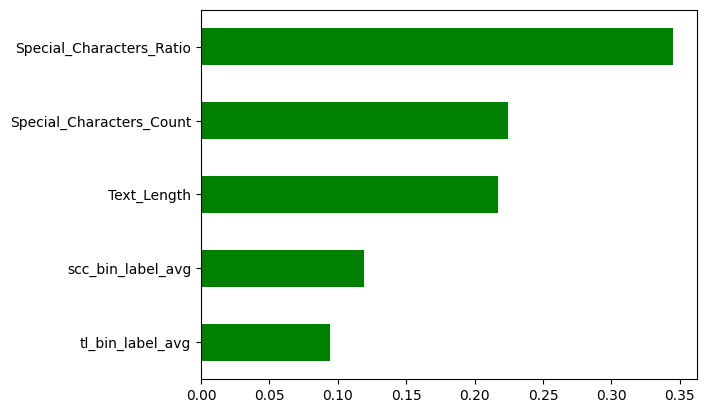

In [ ]:
print("Feature ranking:")
importance = rfc.feature_importances_
indices = np.argsort(importance)[::-1]
for f in indices:
    print(f"{f + 1}. {feature[f]} ({importance[f]})")
feat_importances = pd.Series(rfc.feature_importances_, index=train_df[feature].columns)
feat_importances.nsmallest(len(feature)).plot(kind='barh',color='g')
plt.show()

# Light GBM Classifier

In [ ]:
lgbmc_feature=['Special_Characters_Count','Special_Characters_Ratio','tl_bin_label_avg','Text_Length']

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import precision_score,recall_score,confusion_matrix,classification_report
lgbmc=LGBMClassifier(n_estimators=100,
                     max_depth=2,
                     #class_weight='balanced',
                     random_state=1,
                     verbose=-1,
                     learning_rate=0.005)
lgbmc.fit(train_df[lgbmc_feature],train_df['label'])
y_pred_lgbmc=lgbmc.predict(dev_df[lgbmc_feature])

accuracy = accuracy_score(dev_df['label'], y_pred_lgbmc)
print(f"Accuracy on development data: {accuracy}")
print(classification_report(dev_df['label'],y_pred_lgbmc))

Accuracy on development data: 0.721
              precision    recall  f1-score   support

           0       0.73      0.70      0.71      2500
           1       0.71      0.75      0.73      2500

    accuracy                           0.72      5000
   macro avg       0.72      0.72      0.72      5000
weighted avg       0.72      0.72      0.72      5000



In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

print(confusion_matrix(dev_df['label'],y_pred_lgbmc))

[[1742  758]
 [ 637 1863]]


Feature ranking:
2. Text_Length (84)
1. Special_Characters_Count (79)
3. Special_Characters_Ratio (71)
4. scc_bin_label_avg (66)


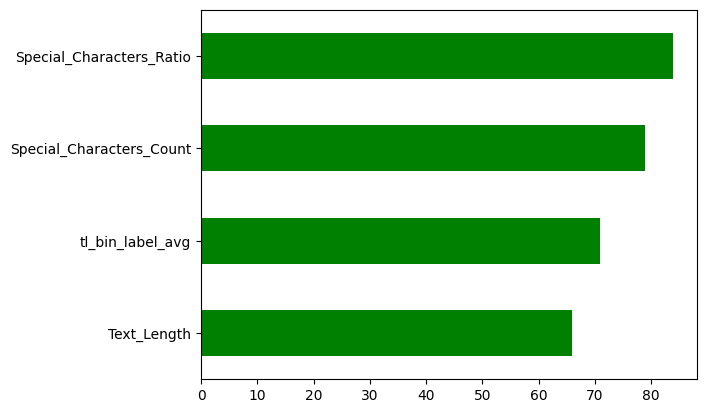

In [ ]:
print("Feature ranking:")
importance = lgbmc.feature_importances_
indices = np.argsort(importance)[::-1]
for f in indices:
    print(f"{f + 1}. {feature[f]} ({importance[f]})")
feat_importances = pd.Series(lgbmc.feature_importances_, index=train_df[lgbmc_feature].columns)
feat_importances.nsmallest(len(lgbmc_feature)).plot(kind='barh',color='g')
plt.show()


# Incorporating truncated text tokens using BERT





In [ ]:
import pickle

with open('/content/drive/MyDrive/subtaskA/mono_pred/train_embeddings512.pkl', 'rb') as file:
    train_embeddings = pickle.load(file)

In [ ]:
train_df['embeddings'] = train_embeddings[:len(train_df)]

In [ ]:
with open('/content/drive/MyDrive/subtaskA/mono_pred/dev_embeddings512.pkl', 'rb') as file:
    dev_embeddings = pickle.load(file)

In [ ]:
dev_df['embeddings'] = dev_embeddings[:len(dev_df)]

In [ ]:
len(train_df.loc[0,'embeddings'])

768

In [ ]:
#train_df.loc[0,'embeddings']

## Creating avg and sum features of embedding

In [ ]:
train_df['embedding_avg'] = train_df['embeddings'].apply(lambda x: np.mean(x))
train_df['embedding_sum'] = train_df['embeddings'].apply(lambda x: np.sum(x))

In [ ]:
dev_df['embedding_avg'] = dev_df['embeddings'].apply(lambda x: np.mean(x))
dev_df['embedding_sum'] = dev_df['embeddings'].apply(lambda x: np.sum(x))

In [ ]:
train_df['embedding_sum'].describe()

count    119757.000000
mean         -9.982048
std           1.308435
min         -16.427170
25%         -10.806076
50%          -9.872453
75%          -9.048218
max          -5.111742
Name: embedding_sum, dtype: float64

In [ ]:
train_df['embedding_avg'].describe()

count    119757.000000
mean         -0.012997
std           0.001704
min          -0.021390
25%          -0.014070
50%          -0.012855
75%          -0.011782
max          -0.006656
Name: embedding_avg, dtype: float64

In [ ]:
train_df.head()

,text,label,model,source,id,Special_Characters_Count,Text_Length,Special_Characters_Ratio,scc_binned,scc_bin_label_avg,tl_binned,tl_bin_label_avg,embeddings,embedding_avg,embedding_sum
0,Forza Motorsport is a popular racing game that...,1,chatGPT,wikihow,0,82,2244,0.036542,others,0.257198,2001-3000,0.574849,"[-0.5115177035331726, -1.0300289392471313, 0.5...",-0.013683,-10.508572
1,Buying Virtual Console games for your Nintendo...,1,chatGPT,wikihow,1,132,3728,0.035408,others,0.257198,others,0.262037,"[-0.6144890785217285, -0.841050386428833, 0.17...",-0.016085,-12.353274
2,Windows NT 4.0 was a popular operating system ...,1,chatGPT,wikihow,2,157,5237,0.029979,others,0.257198,others,0.262037,"[-0.5282367467880249, -0.8618617057800293, 0.1...",-0.015670,-12.034767
3,How to Make Perfume\n\nPerfume is a great way ...,1,chatGPT,wikihow,3,152,4729,0.032142,others,0.257198,others,0.262037,"[-0.41474711894989014, -0.5633561611175537, 0....",-0.014411,-11.067939
4,How to Convert Song Lyrics to a Song'\n\nConve...,1,chatGPT,wikihow,4,89,3095,0.028756,others,0.257198,others,0.262037,"[0.008139261975884438, -0.6293084621429443, -0...",-0.013273,-10.193344


# Special Character Distribution EDA - Start (No need to run)

In [ ]:
# def special_character_statistics(df, text_column, label_column):
#     # Special characters excluding alphanumeric characters and spaces
#     special_chars = set(string.punctuation + string.whitespace) - set(' ')

#     # Counters for human and AI texts
#     human_char_counter = Counter()
#     ai_char_counter = Counter()

#     grouped = df.groupby(label_column)

#     # Loop over each group and count special characters
#     for label, group in grouped:
#         # Concatenate all texts in the group to a single string
#         all_text = ' '.join(group[text_column])
#         filtered_chars = [char for char in all_text if char in special_chars]
#         if label == 0:  # Human-written text
#             human_char_counter.update(filtered_chars)
#         elif label == 1:  # AI-generated text
#             ai_char_counter.update(filtered_chars)

#     return human_char_counter, ai_char_counter


In [ ]:
# import matplotlib.pyplot as plt

# char_name_mapping = {
#     '': 'Space',
#     '"': 'D Quote',
#     "'": 'S Quote',
#     '(': 'L Par',
#     ')': 'R Par',
#     ',': 'Comma',
#     '-': 'Hyphen',
#     '.': 'Period',
#     '/': 'F Slash',
#     '|': 'V Bar',
#     ':': 'Colon'
# }


# def plot_character_frequencies(human_stats, ai_stats, top_n=10):
#     # top N most common characters from human and ai
#     top_human_chars = human_stats.most_common(top_n)
#     top_ai_chars = ai_stats.most_common(top_n)

#     human_chars, human_counts = zip(*top_human_chars)
#     ai_chars, ai_counts = zip(*top_ai_chars)

#     # Char mapping
#     human_char_names = [char_name_mapping.get(char, char) for char in human_chars]
#     ai_char_names = [char_name_mapping.get(char, char) for char in ai_chars]

#     fig, axes = plt.subplots(1, 2, figsize=(15, 5))

#     # Human written texts plot
#     axes[0].bar(human_char_names, human_counts, color='blue')
#     axes[0].set_title('Top {} Special Characters in Human-Written Texts'.format(top_n))
#     axes[0].set_xlabel('Characters')
#     axes[0].set_ylabel('Frequency')

#     # AI written texts plot
#     axes[1].bar(ai_char_names, ai_counts, color='green')
#     axes[1].set_title('Top {} Special Characters in AI-Generated Texts'.format(top_n))
#     axes[1].set_xlabel('Characters')
#     axes[1].set_ylabel('Frequency')

#     plt.tight_layout()
#     plt.show()

In [ ]:
# human_stats, ai_stats = special_character_statistics(train_df, 'text', 'label')
# plot_character_frequencies(human_stats, ai_stats, top_n=10)

In [ ]:
# human_stats, ai_stats = special_character_statistics(dev_df, 'text', 'label')
# plot_character_frequencies(human_stats, ai_stats, top_n=10)

#  Special Character Distribution End - Start (No need to run)

# Embedding in modelling

In [ ]:
train_df.columns

Index(['text', 'label', 'model', 'source', 'id', 'Special_Characters_Count',
       'Text_Length', 'Special_Characters_Ratio', 'scc_binned',
       'scc_bin_label_avg', 'tl_binned', 'tl_bin_label_avg', 'embeddings',
       'embedding_avg', 'embedding_sum'],
      dtype='object')

In [ ]:
train_df.dtypes

text                          object
label                          int64
model                         object
source                        object
id                             int64
Special_Characters_Count       int64
Text_Length                    int64
Special_Characters_Ratio     float64
scc_binned                  category
scc_bin_label_avg            float64
tl_binned                   category
tl_bin_label_avg             float64
embeddings                    object
embedding_avg                float64
embedding_sum                float64
dtype: object

In [ ]:
corr_feature=['label','Special_Characters_Count','Text_Length', 'Special_Characters_Ratio',
              'scc_bin_label_avg','tl_bin_label_avg','embedding_avg','embedding_sum']

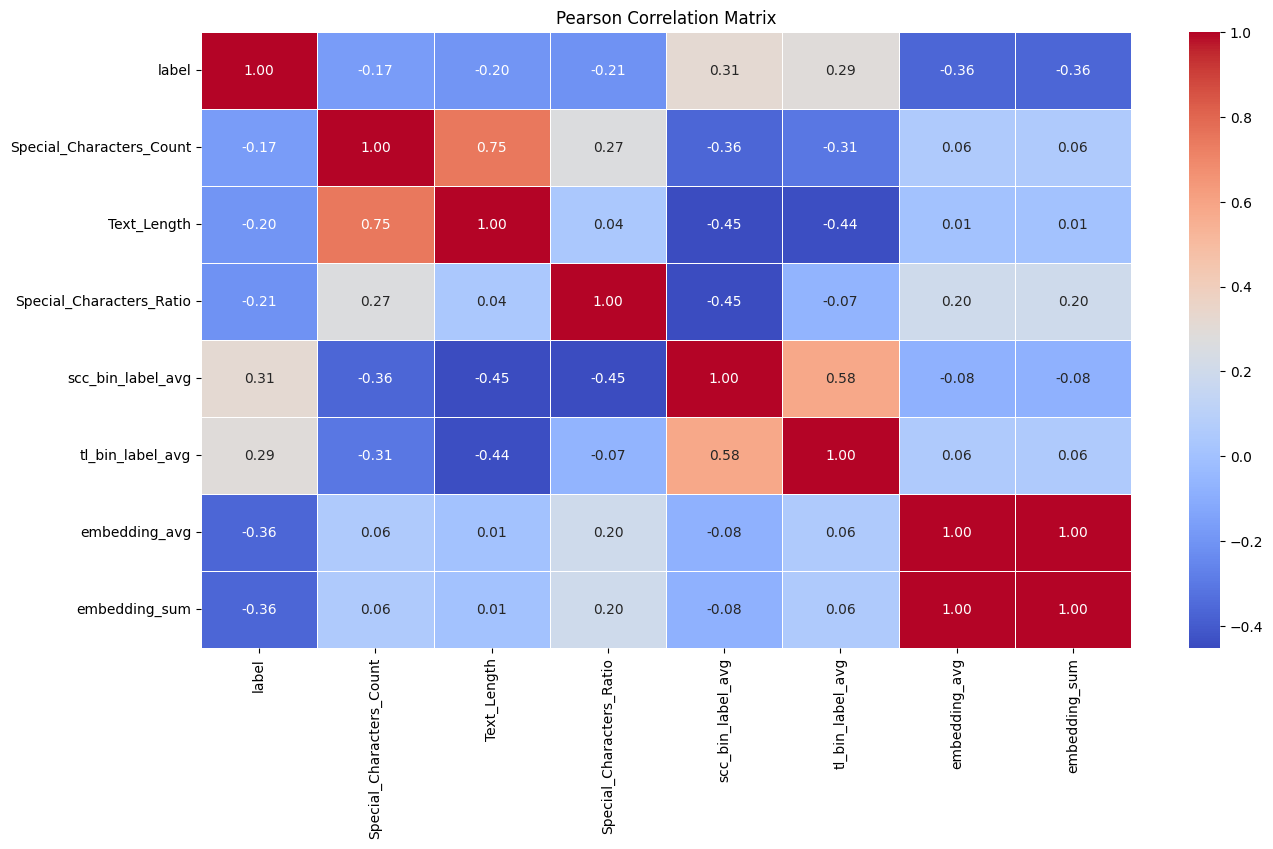

In [ ]:
correlation_matrix = train_df[corr_feature].corr(method='pearson')

# Use seaborn to create a heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Pearson Correlation Matrix')
plt.show()

embedding_avg and embedding_sum have 100% correlation so we will only use one feature

In [ ]:
dev_df.columns

Index(['text', 'label', 'model', 'source', 'id', 'Special_Characters_Count',
       'Text_Length', 'Special_Characters_Ratio', 'scc_binned',
       'scc_bin_label_avg', 'tl_binned', 'tl_bin_label_avg', 'embeddings'],
      dtype='object')

## RFC with embedding avg or sum

In [ ]:
feature=['Special_Characters_Count','Text_Length',
         'Special_Characters_Ratio','scc_bin_label_avg','tl_bin_label_avg','embedding_sum']

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X_train = train_df[feature]
y_train = train_df['label']


X_dev = dev_df[feature]
y_dev = dev_df['label']


rfc = RandomForestClassifier(max_depth=3,n_estimators=100, random_state=42)

rfc.fit(X_train, y_train)


y_pred = rfc.predict(X_dev)


accuracy = accuracy_score(y_dev, y_pred)
report = classification_report(y_dev, y_pred)

print(f"Accuracy on development data: {accuracy}")
print(report)

Accuracy on development data: 0.7226
              precision    recall  f1-score   support

           0       0.72      0.72      0.72      2500
           1       0.72      0.72      0.72      2500

    accuracy                           0.72      5000
   macro avg       0.72      0.72      0.72      5000
weighted avg       0.72      0.72      0.72      5000



In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

print(confusion_matrix(dev_df['label'],y_pred))

[[1810  690]
 [ 697 1803]]


Feature ranking:
6. embedding_sum (0.2791974369264041)
1. Special_Characters_Count (0.18900778915608338)
2. Text_Length (0.17252125316297906)
3. Special_Characters_Ratio (0.1692908557089889)
4. scc_bin_label_avg (0.10323121481472695)
5. tl_bin_label_avg (0.08675145023081765)


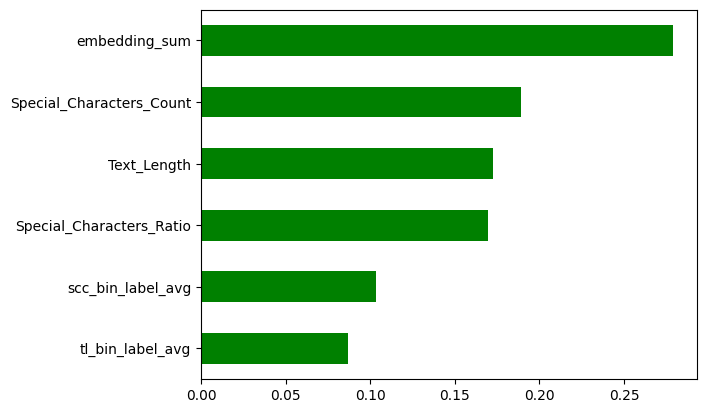

In [ ]:
print("Feature ranking:")
importance = rfc.feature_importances_
indices = np.argsort(importance)[::-1]
for f in indices:
    print(f"{f + 1}. {feature[f]} ({importance[f]})")
feat_importances = pd.Series(rfc.feature_importances_, index=train_df[feature].columns)
feat_importances.nsmallest(len(feature)).plot(kind='barh',color='g')
plt.show()

## LGBMC with embedding avg or sum

In [ ]:
# same performance for embedding abf or sum
# the recall for Human text shoorts up to 84% when using embedding related feature
lgbmc_feature=['Special_Characters_Count','Special_Characters_Ratio','tl_bin_label_avg','Text_Length','embedding_avg']

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import precision_score,recall_score,confusion_matrix,classification_report
lgbmc=LGBMClassifier(n_estimators=100,
                     max_depth=2,
                     #class_weight='balanced',
                     random_state=1,
                     verbose=-1,
                     learning_rate=0.005)
lgbmc.fit(train_df[lgbmc_feature],train_df['label'])
y_pred_lgbmc=lgbmc.predict(dev_df[lgbmc_feature])

accuracy = accuracy_score(dev_df['label'], y_pred_lgbmc)
print(f"Accuracy on development data: {accuracy}")
print(classification_report(dev_df['label'],y_pred_lgbmc))

Accuracy on development data: 0.6138
              precision    recall  f1-score   support

           0       0.58      0.84      0.69      2500
           1       0.71      0.39      0.50      2500

    accuracy                           0.61      5000
   macro avg       0.64      0.61      0.59      5000
weighted avg       0.64      0.61      0.59      5000



In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

print(confusion_matrix(dev_df['label'],y_pred_lgbmc))

[[2106  394]
 [1537  963]]


Feature ranking:
5. tl_bin_label_avg (122)
2. Text_Length (50)
1. Special_Characters_Count (45)
4. scc_bin_label_avg (43)
3. Special_Characters_Ratio (40)


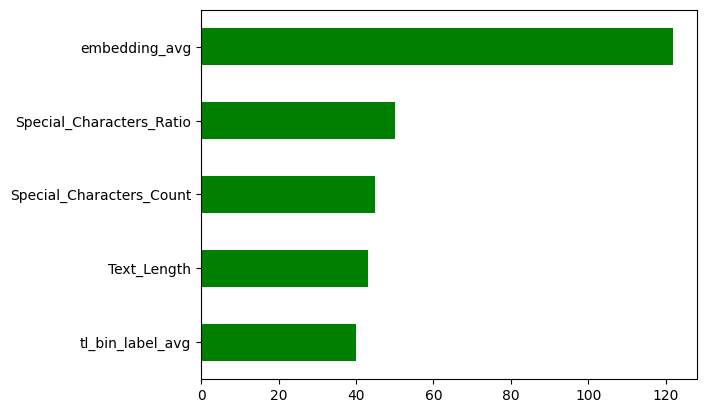

In [ ]:
print("Feature ranking:")
importance = lgbmc.feature_importances_
indices = np.argsort(importance)[::-1]
for f in indices:
    print(f"{f + 1}. {feature[f]} ({importance[f]})")
feat_importances = pd.Series(lgbmc.feature_importances_, index=train_df[lgbmc_feature].columns)
feat_importances.nsmallest(len(lgbmc_feature)).plot(kind='barh',color='g')
plt.show()

# Using important embedding dimensions only

In [ ]:
train_embeddings_df = pd.DataFrame(train_embeddings)

embedding_column_names = ['em' + str(i+1) for i in range(train_embeddings_df.shape[1])]
train_embeddings_df.columns = embedding_column_names

X_train = pd.concat([train_df[feature], train_embeddings_df], axis=1)

In [ ]:
dev_embeddings_df = pd.DataFrame(dev_embeddings)

embedding_column_names = ['em' + str(i+1) for i in range(dev_embeddings_df.shape[1])]
dev_embeddings_df.columns = embedding_column_names

X_dev = pd.concat([dev_df[feature], dev_embeddings_df], axis=1)

In [ ]:
X_dev.head()

,Special_Characters_Count,Text_Length,Special_Characters_Ratio,scc_bin_label_avg,tl_bin_label_avg,embedding_sum,em1,em2,em3,em4,...,em759,em760,em761,em762,em763,em764,em765,em766,em767,em768
0,30,1145,0.026201,0.606684,0.481359,-10.206292,-0.081500,-0.394133,-0.159920,0.095546,...,-0.222107,-0.952389,-0.115791,-0.236326,0.289517,0.554950,-0.320455,-0.158106,0.104118,0.083840
1,33,986,0.033469,0.572254,0.921156,-8.660556,-0.319327,-0.796955,-0.013690,0.391537,...,-0.101144,-0.276162,0.205774,-0.561559,0.461067,0.745441,-0.204061,0.451703,0.595883,0.300897
2,40,997,0.040120,0.572254,0.921156,-8.112583,0.223510,-0.091472,0.286250,-0.326605,...,-0.091433,-0.645385,-0.111687,-0.438653,-0.109692,0.602660,-0.160662,0.020146,-0.012950,0.654665
3,42,1375,0.030545,0.541229,0.481359,-9.173383,0.471499,0.015644,-0.653710,-0.358005,...,0.215722,-0.204474,-0.018365,-0.420198,0.032387,0.024422,-0.102501,-0.017253,0.434313,0.264886
4,62,1045,0.059330,0.412841,0.481359,-7.892806,-0.261189,0.117364,0.093666,-0.695782,...,0.181303,-0.903822,-0.146113,-0.476007,-0.085916,0.484191,-0.323996,-0.585817,0.617592,0.373310


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

#X_train = train_dfx[feature1]
y_train = train_df['label']


#X_dev = dev_dfx[feature1]
y_dev = dev_df['label']


rfc = RandomForestClassifier(max_depth=3,n_estimators=100, random_state=42)

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_dev)


accuracy = accuracy_score(y_dev, y_pred)
report = classification_report(y_dev, y_pred)

print(f"Accuracy on development data: {accuracy}")
print(report)

Accuracy on development data: 0.5344
              precision    recall  f1-score   support

           0       0.52      0.94      0.67      2500
           1       0.67      0.13      0.22      2500

    accuracy                           0.53      5000
   macro avg       0.60      0.53      0.45      5000
weighted avg       0.60      0.53      0.45      5000



In [ ]:
importance = rfc.feature_importances_
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': importance})

# Filter out features with non-zero importance
non_zero_importances = feature_importances[feature_importances['importance'] > 0]

In [ ]:
# top 20 important features
non_zero_importances.sort_values(by='importance', ascending=False).head(10)

,feature,importance
492,em487,0.042733
635,em630,0.038259
5,embedding_sum,0.038031
240,em235,0.036166
147,em142,0.032857
29,em24,0.029285
69,em64,0.028723
245,em240,0.028606
587,em582,0.026854
170,em165,0.025411


In [ ]:
non_zero_importances.sort_values(by='importance', ascending=False).head(20)['feature'].tolist()

['em487',
 'em630',
 'embedding_sum',
 'em235',
 'em142',
 'em24',
 'em64',
 'em240',
 'em582',
 'em165',
 'em594',
 'scc_bin_label_avg',
 'em374',
 'em188',
 'em584',
 'em14',
 'em206',
 'Special_Characters_Count',
 'em261',
 'em309']

In [ ]:
train_df.head()

,text,label,model,source,id,Special_Characters_Count,Text_Length,Special_Characters_Ratio,scc_binned,scc_bin_label_avg,tl_binned,tl_bin_label_avg,embeddings,embedding_avg,embedding_sum
0,Forza Motorsport is a popular racing game that...,1,chatGPT,wikihow,0,82,2244,0.036542,others,0.257198,2001-3000,0.574849,"[-0.5115177035331726, -1.0300289392471313, 0.5...",-0.013683,-10.508572
1,Buying Virtual Console games for your Nintendo...,1,chatGPT,wikihow,1,132,3728,0.035408,others,0.257198,others,0.262037,"[-0.6144890785217285, -0.841050386428833, 0.17...",-0.016085,-12.353274
2,Windows NT 4.0 was a popular operating system ...,1,chatGPT,wikihow,2,157,5237,0.029979,others,0.257198,others,0.262037,"[-0.5282367467880249, -0.8618617057800293, 0.1...",-0.015670,-12.034767
3,How to Make Perfume\n\nPerfume is a great way ...,1,chatGPT,wikihow,3,152,4729,0.032142,others,0.257198,others,0.262037,"[-0.41474711894989014, -0.5633561611175537, 0....",-0.014411,-11.067939
4,How to Convert Song Lyrics to a Song'\n\nConve...,1,chatGPT,wikihow,4,89,3095,0.028756,others,0.257198,others,0.262037,"[0.008139261975884438, -0.6293084621429443, -0...",-0.013273,-10.193344


In [ ]:
feature=['em487',
 'em630',
 'embedding_sum',
 'em235',
 'em142',
 'em24',
 'em64',
 'em240',
 'em582',
 'em165',
 'em594',
 'scc_bin_label_avg',
 'em374',
 'em188',
 'em584',
 'em14',
 'em206',
 'Special_Characters_Count',
 'em261',
 'em309']

In [ ]:
X_train_mini = X_train[feature]
y_train = train_df['label']

X_dev_mini = X_dev[feature]
y_dev = dev_df['label']

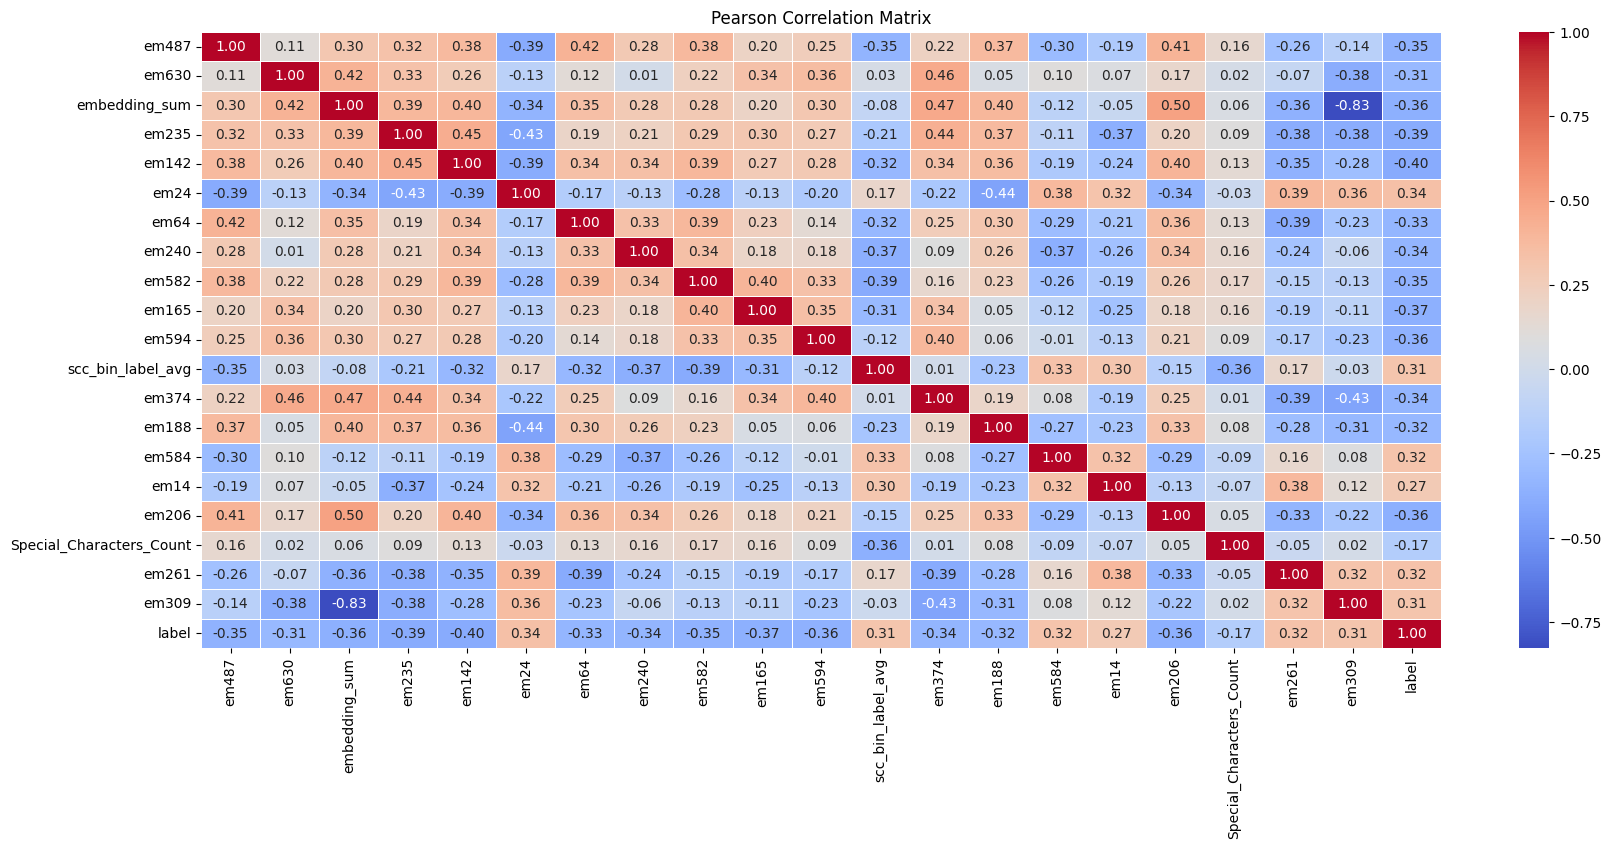

In [ ]:
X_train_mini_with_label = X_train_mini.copy()
X_train_mini_with_label['label'] = y_train
correlation_matrix = X_train_mini_with_label.corr(method='pearson')

# Use seaborn to create a heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Pearson Correlation Matrix')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rfc = RandomForestClassifier(max_depth=3,n_estimators=100, random_state=42)

rfc.fit(X_train_mini, y_train)

y_pred = rfc.predict(X_dev_mini)


accuracy = accuracy_score(y_dev, y_pred)
report = classification_report(y_dev, y_pred)

print(f"Accuracy on development data: {accuracy}")
print(report)

Accuracy on development data: 0.5268
              precision    recall  f1-score   support

           0       0.52      0.91      0.66      2500
           1       0.62      0.14      0.23      2500

    accuracy                           0.53      5000
   macro avg       0.57      0.53      0.44      5000
weighted avg       0.57      0.53      0.44      5000



In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

print(confusion_matrix(dev_df['label'],y_pred))

[[2278  222]
 [2144  356]]


Feature ranking:
4. em235 (0.12579096304387996)
5. em142 (0.09594752141134849)
11. em594 (0.08553723476798461)
6. em24 (0.08396776509610272)
3. embedding_sum (0.07242421364119515)
15. em584 (0.06832921767130212)
10. em165 (0.067683791552094)
17. em206 (0.06454893964029552)
8. em240 (0.04621889605853981)
12. scc_bin_label_avg (0.04597728522214899)
9. em582 (0.038718101697524196)
18. Special_Characters_Count (0.03461940592405937)
1. em487 (0.033806226591647816)
13. em374 (0.030161157218141884)
19. em261 (0.02890036918515363)
7. em64 (0.02848617046184408)
2. em630 (0.01820179859142118)
20. em309 (0.016284677477556037)
16. em14 (0.008100888296761057)
14. em188 (0.006295376450999544)


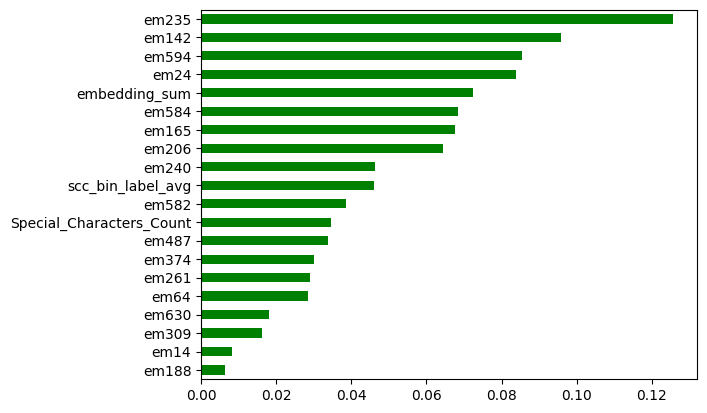

In [ ]:
print("Feature ranking:")
importance = rfc.feature_importances_
indices = np.argsort(importance)[::-1]
for f in indices:
    print(f"{f + 1}. {feature[f]} ({importance[f]})")
feat_importances = pd.Series(rfc.feature_importances_, index=X_train[feature].columns)
feat_importances.nsmallest(len(feature)).plot(kind='barh',color='g')
plt.show()

Removing bottom 8 features

In [ ]:
feature=[ #'em487',
 #'em630',
 'embedding_sum',
 'em235',
 'em142',
 'em24',
 #'em64',
 'em240',
 'em582',
 'em165',
 'em594',
 'scc_bin_label_avg',
 #'em374',
 #'em188',
 'em584',
 #'em14',
 'em206',
 'Special_Characters_Count',
 #'em261',
 #'em309'
          ]

In [ ]:
X_train_mini = X_train[feature]
y_train = train_df['label']

X_dev_mini = X_dev[feature]
y_dev = dev_df['label']

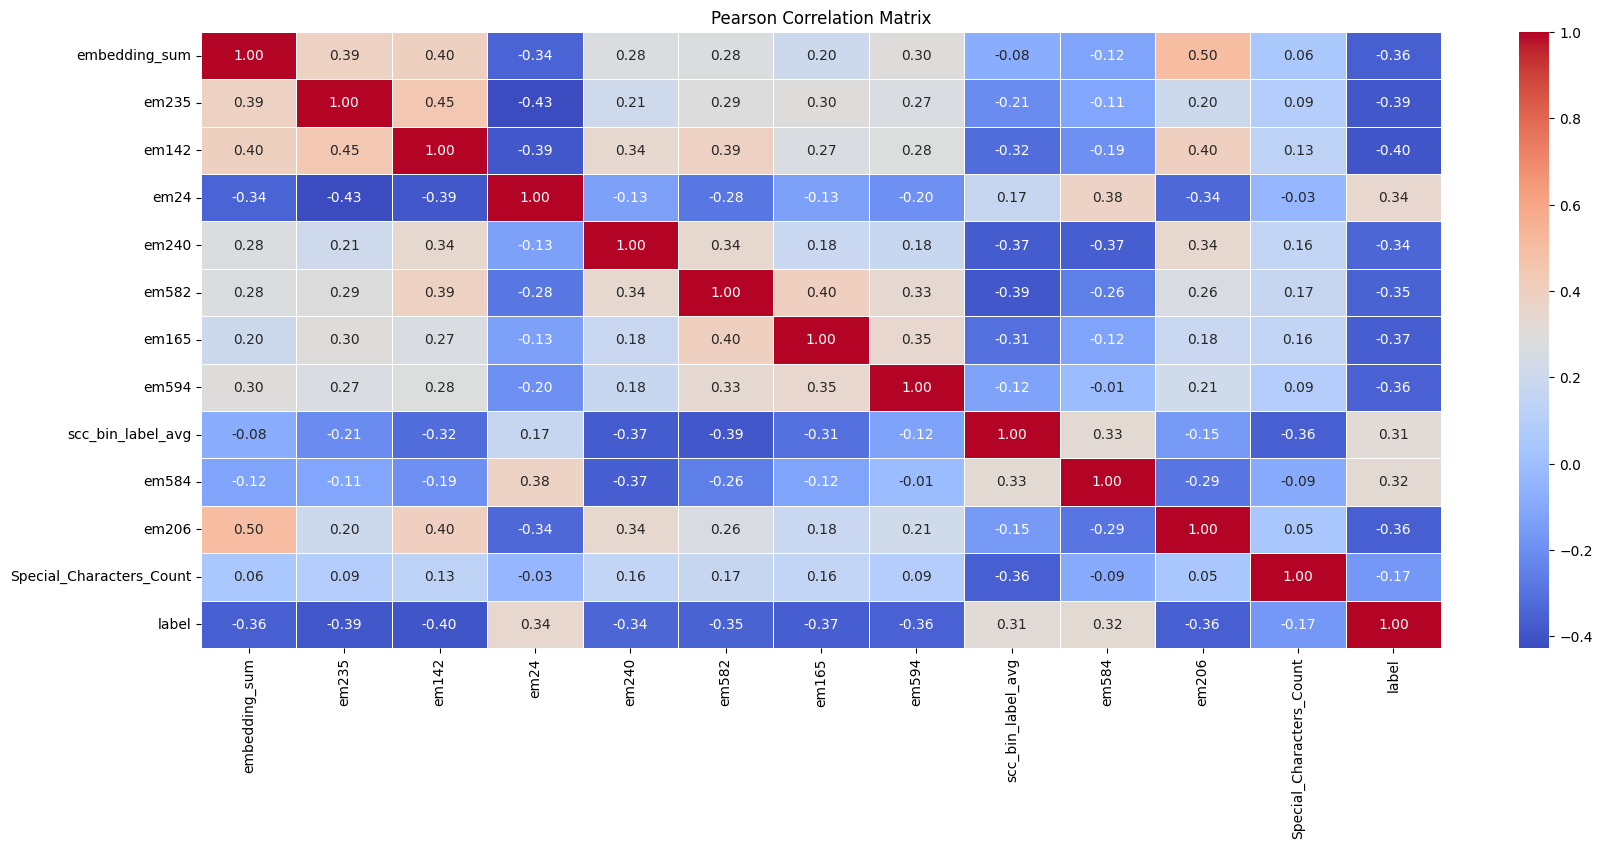

In [ ]:
X_train_mini_with_label = X_train_mini.copy()
X_train_mini_with_label['label'] = y_train
correlation_matrix = X_train_mini_with_label.corr(method='pearson')

# Use seaborn to create a heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Pearson Correlation Matrix')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rfc = RandomForestClassifier(max_depth=3,n_estimators=100, random_state=42)

rfc.fit(X_train_mini, y_train)

y_pred = rfc.predict(X_dev_mini)


accuracy = accuracy_score(y_dev, y_pred)
report = classification_report(y_dev, y_pred)

print(f"Accuracy on development data: {accuracy}")
print(report)

Accuracy on development data: 0.5338
              precision    recall  f1-score   support

           0       0.52      0.89      0.66      2500
           1       0.62      0.17      0.27      2500

    accuracy                           0.53      5000
   macro avg       0.57      0.53      0.46      5000
weighted avg       0.57      0.53      0.46      5000



Feature ranking:
2. em235 (0.17743592523373447)
3. em142 (0.16273450011833132)
8. em594 (0.11109273073336447)
7. em165 (0.0742042825213275)
5. em240 (0.07175477031695743)
10. em584 (0.07055093218196136)
12. Special_Characters_Count (0.06820310455439715)
1. embedding_sum (0.06470396475454551)
4. em24 (0.059206468835969105)
11. em206 (0.05645338663154752)
6. em582 (0.0452219989744163)
9. scc_bin_label_avg (0.0384379351434479)


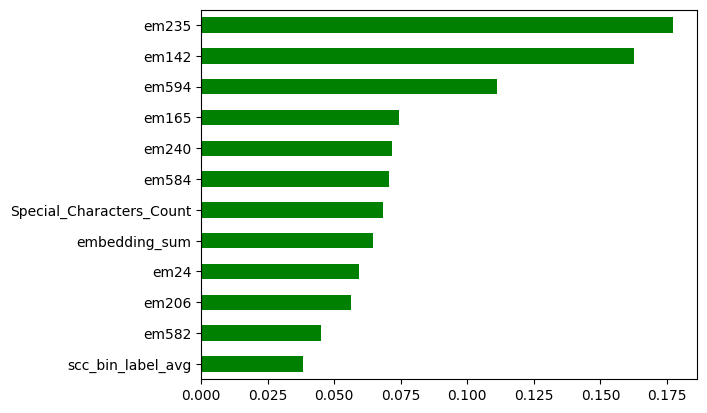

In [ ]:
print("Feature ranking:")
importance = rfc.feature_importances_
indices = np.argsort(importance)[::-1]
for f in indices:
    print(f"{f + 1}. {feature[f]} ({importance[f]})")
feat_importances = pd.Series(rfc.feature_importances_, index=X_train[feature].columns)
feat_importances.nsmallest(len(feature)).plot(kind='barh',color='g')
plt.show()

In [ ]:
feature=[#'em487',
 #'em630',
 'embedding_sum',
 'em235',
 'em142',
 #'em24',
 #'em64',
 #'em240',
 #'em582',
 #'em165',
 'em594',
 'scc_bin_label_avg',
 #'em374',
 #'em188',
 #'em584',
 #'em14',
 #'em206',
 'Special_Characters_Count',
 #'em261',
 #'em309'
"Text_Length",
        "Special_Characters_Ratio",
          "tl_bin_label_avg" ,



          ]

In [ ]:
X_train_mini = X_train[feature]
y_train = train_df['label']

X_dev_mini = X_dev[feature]
y_dev = dev_df['label']

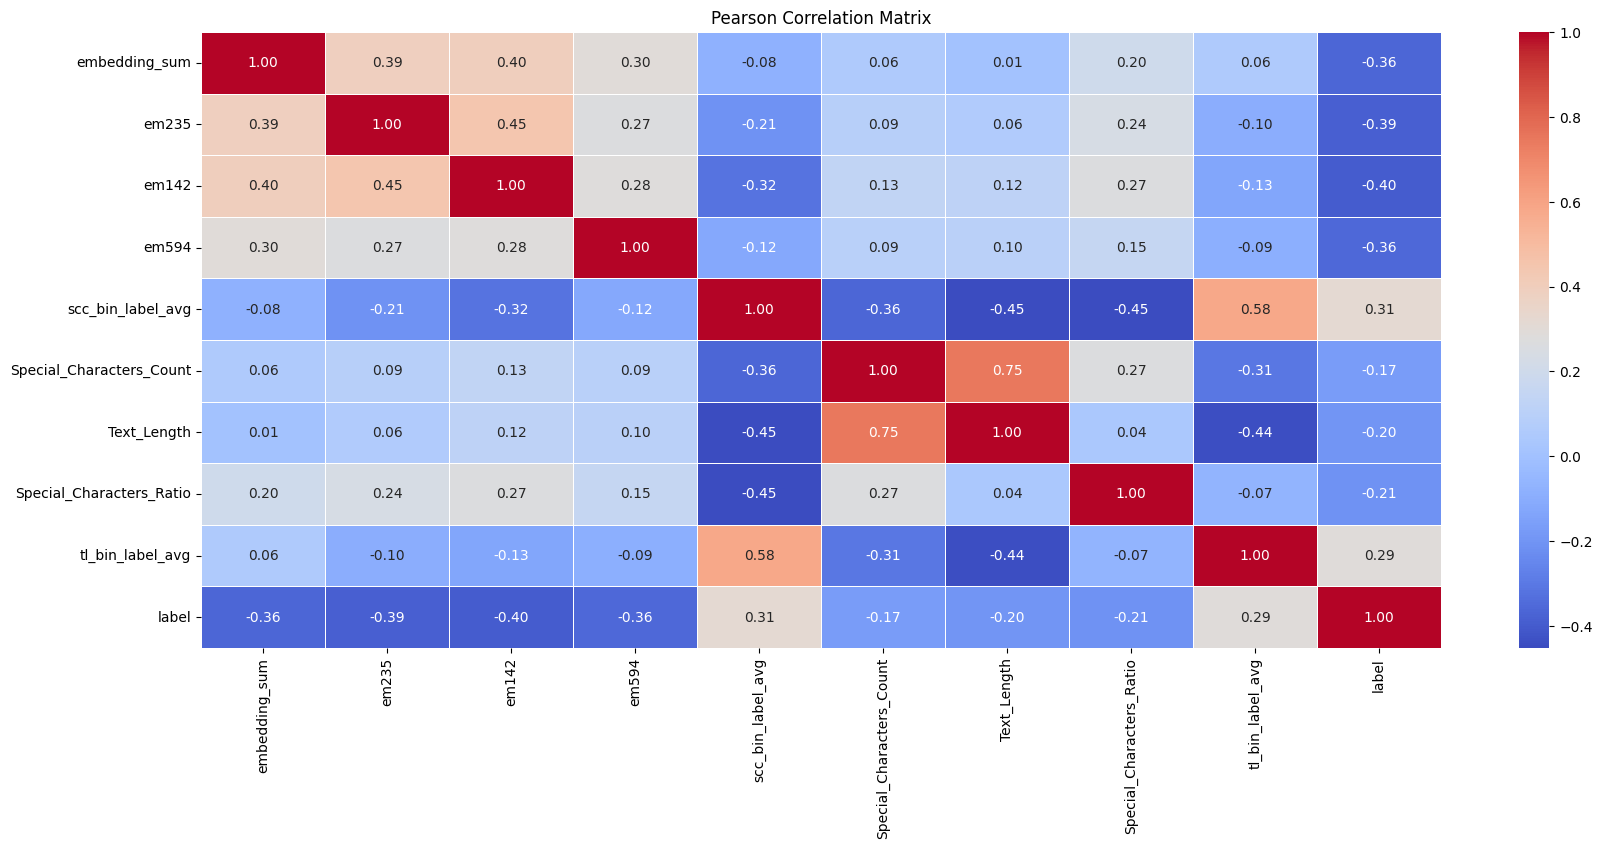

In [ ]:
X_train_mini_with_label = X_train_mini.copy()
X_train_mini_with_label['label'] = y_train
correlation_matrix = X_train_mini_with_label.corr(method='pearson')

# Use seaborn to create a heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Pearson Correlation Matrix')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rfc = RandomForestClassifier(max_depth=5,n_estimators=500, random_state=42)

rfc.fit(X_train_mini, y_train)

y_pred = rfc.predict(X_dev_mini)


accuracy = accuracy_score(y_dev, y_pred)
report = classification_report(y_dev, y_pred)

print(f"Accuracy on development data: {accuracy}")
print(report)

Accuracy on development data: 0.748
              precision    recall  f1-score   support

           0       0.71      0.83      0.77      2500
           1       0.80      0.67      0.73      2500

    accuracy                           0.75      5000
   macro avg       0.75      0.75      0.75      5000
weighted avg       0.75      0.75      0.75      5000



In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

print(confusion_matrix(dev_df['label'],y_pred_lgbmc))

[[2106  394]
 [1537  963]]


Feature ranking:
2. em235 (0.1928309430874014)
3. em142 (0.17603884964201075)
4. em594 (0.1534630711199465)
1. embedding_sum (0.11595800667995561)
7. Text_Length (0.11199126875720311)
6. Special_Characters_Count (0.0780385234587556)
8. Special_Characters_Ratio (0.07616898737799202)
9. tl_bin_label_avg (0.06079089354367975)
5. scc_bin_label_avg (0.034719456333055246)


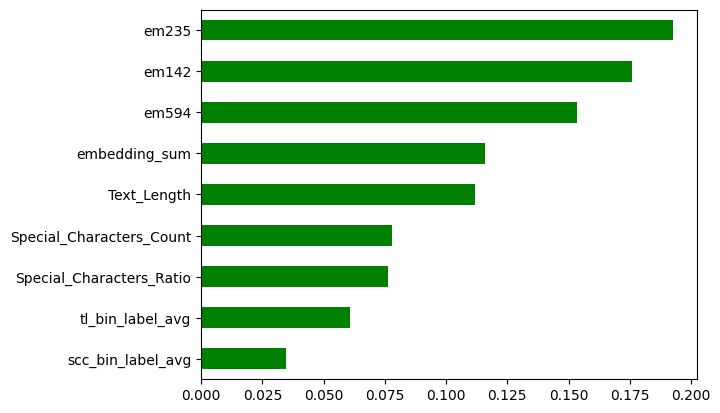

In [ ]:
print("Feature ranking:")
importance = rfc.feature_importances_
indices = np.argsort(importance)[::-1]
for f in indices:
    print(f"{f + 1}. {feature[f]} ({importance[f]})")
feat_importances = pd.Series(rfc.feature_importances_, index=X_train[feature].columns)
feat_importances.nsmallest(len(feature)).plot(kind='barh',color='g')
plt.show()

# Competition Format Checker and Scorer

In [ ]:
def write_predictions(dev_df, predictions, file_path):
    pred_df = pd.DataFrame({'id': dev_df['id'], 'label': predictions})
    pred_df.to_json(file_path, orient='records', lines=True)

prediction_file_path = '/content/drive/MyDrive/subtaskA/mono_pred/rfc_results_file.jsonl'
write_predictions(dev_df, y_pred, prediction_file_path)

In [ ]:
gold_labels_df = dev_df[['id', 'label']]

gold_labels_path = '/content/drive/MyDrive/subtaskA/mono_pred/gold_labels.jsonl'

gold_labels_df.to_json(gold_labels_path, orient='records', lines=True)

In [ ]:
!python3 "/content/drive/MyDrive/subtaskA/format_checker/format_checker.py" --pred_files_path="/content/drive/MyDrive/subtaskA/mono_pred/rfc_results_file.jsonl"

INFO : Subtask A and B. Checking files: ['/content/drive/MyDrive/subtaskA/mono_pred/rfc_results_file.jsonl']
INFO : Subtask A and B. Checking file: ['/content/drive/MyDrive/subtaskA/mono_pred/rfc_results_file.jsonl']. Result: Format is correct


In [ ]:
!python3 "/content/drive/MyDrive/subtaskA/scorer.py" --gold_file_path='/content/drive/MyDrive/subtaskA/mono_pred/gold_labels.jsonl' --pred_file_path="/content/drive/MyDrive/subtaskA/mono_pred/rfc_results_file.jsonl"

INFO : Prediction file format is correct
INFO : macro-F1=0.71599	micro-F1=0.71620	accuracy=0.71620


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import Dataset, DataLoader
import torch

# For reproducibility
def set_seed(seed):
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)

set_seed(42)

# Load the tokenizer for the pre-trained model
tokenizer = AutoTokenizer.from_pretrained("roberta-base")

# Create a custom dataset class for our data
class TextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=512):
        self.tokenizer = tokenizer
        self.texts = texts
        self.labels = labels
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]

        # Encoding the text with the respective tokenizer
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }


# Defining the dataset parameters
BATCH_SIZE = 16
MAX_LEN = 256 # Can adjust as needed

# Create instances of the dataset
train_dataset = TextDataset(train_df['text'].tolist(), train_df['label'].tolist(), tokenizer, max_length=MAX_LEN)
dev_dataset = TextDataset(dev_df['text'].tolist(), dev_df['label'].tolist(), tokenizer, max_length=MAX_LEN)

# Create data loaders for our datasets; these will automatically generate batches of data
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
dev_loader = DataLoader(dev_dataset, batch_size=BATCH_SIZE)

# Load the pre-trained model for sequence classification
model = AutoModelForSequenceClassification.from_pretrained("roberta-base", num_labels=2)

# Check if GPU is available and move model to GPU if it is
if torch.cuda.is_available():
    print("GPU Present!")
    model = model.cuda()

model.num_labels, model.config.id2label, model.config.label2id


config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


GPU Present!


(2, {0: 'LABEL_0', 1: 'LABEL_1'}, {'LABEL_0': 0, 'LABEL_1': 1})

In [ ]:
from transformers import AdamW, get_linear_schedule_with_warmup


import torch

# Check if a GPU is available and use it; otherwise, use the CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

# Now you should move your model to the device
model.to(device)

# Define the optimizer
optimizer = AdamW(model.parameters(), lr=5e-5)

EPOCHS = 2  # can be tuned

# Total number of training steps
total_steps = len(train_loader) * EPOCHS

# Set up the learning rate scheduler
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps=0,
                                            num_training_steps=total_steps)


cuda


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score
from tqdm import tqdm  # for progress bar



# Move the model into training mode
model.train()

for epoch in range(EPOCHS):
    total_loss = 0
    predictions, true_labels = [], []

    for batch in tqdm(train_loader):
        # Clear any previously calculated gradients
        optimizer.zero_grad()

        # Add batch to GPU
        batch = {k: v.to(device) for k, v in batch.items()}

        # Forward pass
        outputs = model(**batch)

        # Get the loss and logits
        loss = outputs.loss
        logits = outputs.logits

        # Backward pass
        loss.backward()

        # Clip the norm of the gradients to 1.0 to prevent "exploding gradients"
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and learning rate
        optimizer.step()
        scheduler.step()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = batch['labels'].to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences
        batch_preds = np.argmax(logits, axis=1)
        batch_labels = label_ids

        # Accumulate the predictions and the true labels
        predictions.extend(batch_preds)
        true_labels.extend(batch_labels)

        # Accumulate the training loss over all of the batches
        total_loss += loss.item()

    # Calculate the average loss over the training data
    avg_train_loss = total_loss / len(train_loader)

    # Calculate training accuracy
    train_accuracy = accuracy_score(true_labels, predictions)

    print(f'Epoch {epoch + 1}/{EPOCHS}')
    print(f'Training loss: {avg_train_loss}')
    print(f'Training accuracy: {train_accuracy}')


100%|██████████| 7485/7485 [1:36:01<00:00,  1.30it/s]


Epoch 1/2
Training loss: 0.05913621308607856
Training accuracy: 0.985537379860885


100%|██████████| 7485/7485 [1:36:14<00:00,  1.30it/s]

Epoch 2/2
Training loss: 0.015003073240408055
Training accuracy: 0.9969688619454395


Mounted at /content/drive


In [ ]:
model_save_path = "/content/drive/My Drive/roberta-base.pth"
torch.save(model.state_dict(), model_save_path)

In [ ]:
# #load model later

# # Assuming you have the model class defined or a pre-trained model loaded
# model = YourModelClassOrPretrainedModel()

# # Load the state dictionary
# model.load_state_dict(torch.load(model_save_path))

# # Remember to move the model to the appropriate device
# model.to(device)

In [ ]:
def evaluate_model(model, dev_loader):
    # Put the model in evaluation mode
    model.eval()

    predictions , true_labels = [], []

    for batch in dev_loader:
        # Add batch to GPU
        batch = {k: v.to(device) for k, v in batch.items()}

        # Telling the model not to compute or store gradients, saving memory and speeding up prediction
        with torch.no_grad():
            # Forward pass, calculate logit predictions
            outputs = model(**batch)

        logits = outputs.logits
        label_ids = batch['labels']

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = label_ids.to('cpu').numpy()

        # Store predictions and true labels
        batch_preds = np.argmax(logits, axis=1)
        batch_labels = label_ids

        predictions.extend(batch_preds)
        true_labels.extend(batch_labels)

    return predictions, true_labels

# Evaluate the model
predictions, true_labels = evaluate_model(model, dev_loader)

In [ ]:
def write_predictions(dev_df, predictions, file_path):
    # Make sure predictions and IDs are aligned
    pred_df = pd.DataFrame({'id': dev_df['id'], 'label': predictions})
    pred_df.to_json(file_path, orient='records', lines=True)

# Specify the path to save predictions
prediction_file_path = '/content/drive/My Drive/roberta_base_results_file.jsonl'  # Replace with your path
write_predictions(dev_df, predictions, prediction_file_path)

In [ ]:
# Assuming dev_df is your development DataFrame and it contains 'id' and 'label' columns

# Extract 'id' and 'label' columns
gold_labels_df = dev_df[['id', 'label']]

# Define the file path for saving
gold_labels_path = '/content/drive/My Drive/gold_labels.jsonl'  # You can change the path as needed

# Save to a JSONL file
gold_labels_df.to_json(gold_labels_path, orient='records', lines=True)

In [ ]:
!python3 format_checker.py --pred_files_path="/content/drive/My Drive/roberta_base_results_file.jsonl"

INFO : Subtask A and B. Checking files: ['/content/drive/My Drive/roberta_base_results_file.jsonl']
INFO : Subtask A and B. Checking file: ['/content/drive/My Drive/roberta_base_results_file.jsonl']. Result: Format is correct


In [ ]:
!python3 "/content/scorer.py" --gold_file_path='/content/drive/My Drive/gold_labels.jsonl' --pred_file_path="/content/drive/My Drive/roberta_base_results_file.jsonl"


INFO : Prediction file format is correct
INFO : macro-F1=0.59410	micro-F1=0.64080	accuracy=0.64080
